# Ford GoBike Data Exploration  
### Part II – Explanatory Slide Deck  
**By: Sultan Alanazi**

#### Dataset Overview
>This explanatory analysis uses the cleaned dataset produced in Part I, containing **160,184 bike-share trips**.
>This presentation uses a cleaned and enhanced dataset of 160,184 Bay Wheels bike-share trips. The dataset includes:
>* Trip duration in seconds, minutes, and hours
>* Timestamps for trip start and end
>* Start/end station details (ID, name, coordinates)
>* Rider attributes (age, gender, user type)
>* Engineered features:
>   - member_age 
>   - duration_minute
>   - duration_hour
>   - start_hour
>   - weekday
>#### **Source**
>* The dataset originates from the official **Bay Wheels** (formerly Ford GoBike) system.
>* This cleaned dataset provides accurate, consistent, and analysis-ready information for identifying meaningful riding patterns.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r'dataset/201902-fordgobike-tripdata_v20251117.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160184 entries, 0 to 160183
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             160184 non-null  int64  
 1   start_time               160184 non-null  object 
 2   end_time                 160184 non-null  object 
 3   start_station_id         160184 non-null  float64
 4   start_station_name       160184 non-null  object 
 5   start_station_latitude   160184 non-null  float64
 6   start_station_longitude  160184 non-null  float64
 7   end_station_id           160184 non-null  float64
 8   end_station_name         160184 non-null  object 
 9   end_station_latitude     160184 non-null  float64
 10  end_station_longitude    160184 non-null  float64
 11  bike_id                  160184 non-null  int64  
 12  user_type                160184 non-null  object 
 13  member_birth_year        160184 non-null  float64
 14  memb

## Key Questions & Summary of Findings

#### **Q1: How does trip duration differ across genders?**
- All genders have similar median trip durations.
- Female and "Other" riders show higher variability and more long-duration outliers.

#### **Q2: When do Subscribers vs. Customers typically ride?**
- **Subscribers** ride mostly during **8 AM** and **5–6 PM** → commuting pattern.
- **Customers** ride mainly between **10 AM – 5 PM** → recreational usage.

#### **Q3: How does trip duration vary by user type across the week?**
- **Subscribers**: short, consistent trips all week.
- **Customers**: longer trips, especially on **weekends**.

These insights form the story that will be visualized in the following slides.


## (Visualization 1) Trip Duration by Gender
>* This boxplot compares trip duration between male, female, and “other” riders.
>* It highlights differences in distribution, variability, and long-duration outliers.

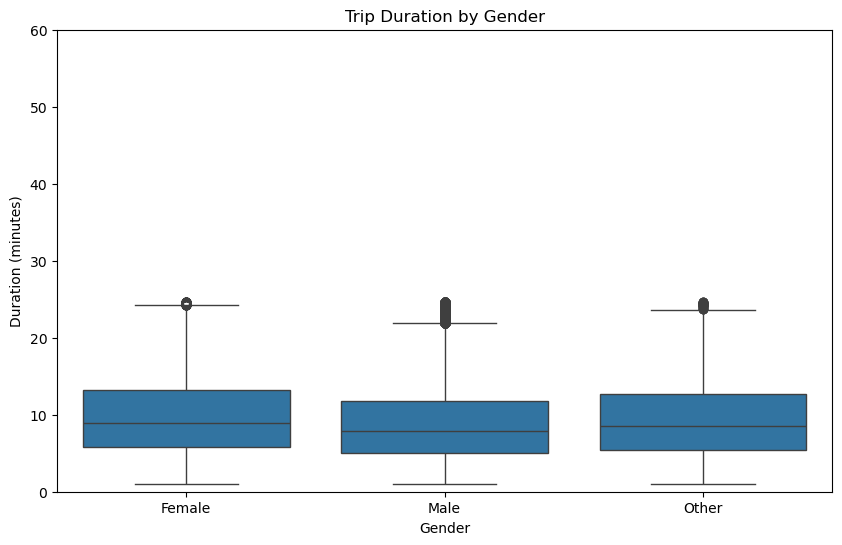

In [15]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df, x='member_gender', y='duration_minute')
plt.title('Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 60)
plt.show()


## (Visualization 2) Riding Times by User Type

This plot shows hourly ride frequencies for Subscribers and Customers:
>- Subscribers show strong commute peaks.
>- Customers ride more frequently in the middle of the day.


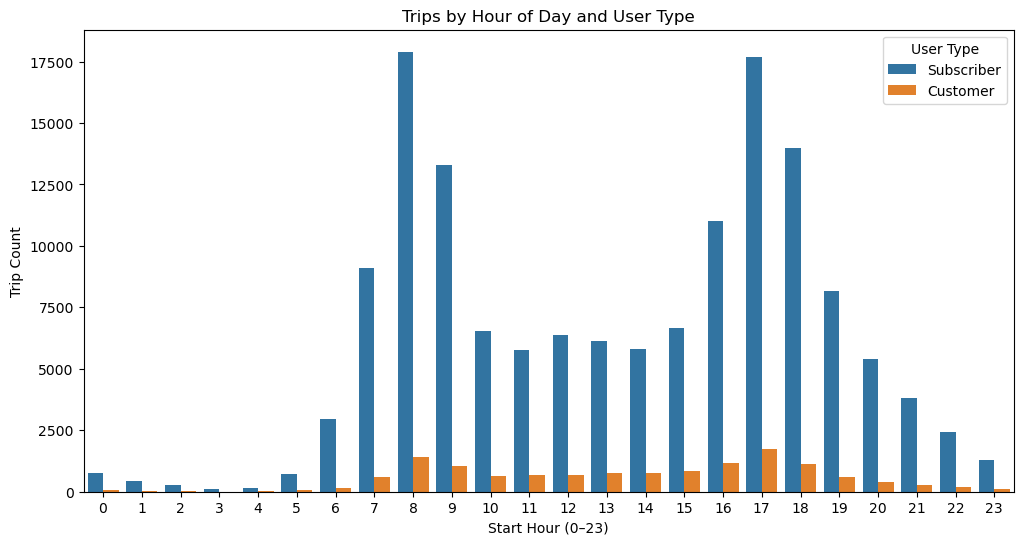

In [16]:
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_hour', hue='user_type')
plt.title('Trips by Hour of Day and User Type')
plt.xlabel('Start Hour (0–23)')
plt.ylabel('Trip Count')
plt.legend(title='User Type')
plt.show()


## (Visualization 3) Median Trip Duration by User Type & Weekday

A heatmap showing how median trip duration varies for Subscribers and Customers across weekdays.
>- Subscribers: consistently short weekday trips.
>- Customers: longest trips on weekends.


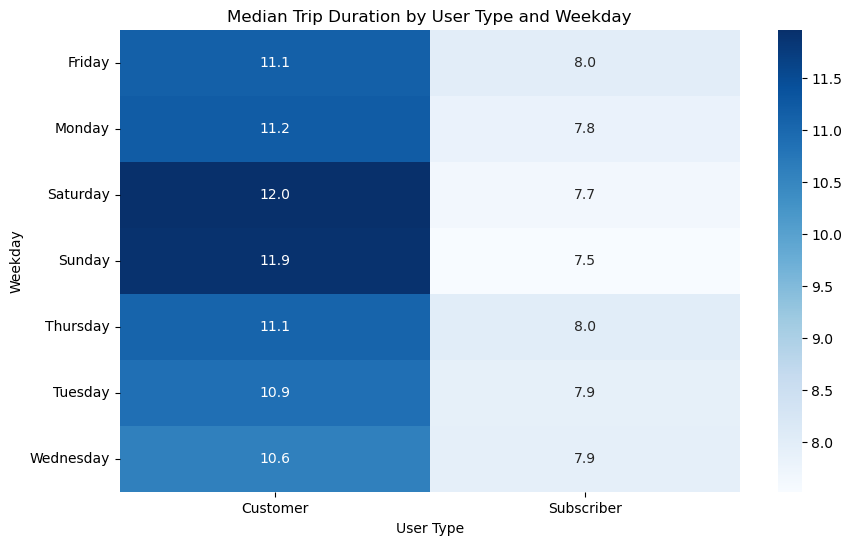

In [33]:
plt.figure(figsize=(10,6))
sb.heatmap(df.pivot_table(values='duration_minute',index='weekday',columns='user_type',aggfunc='median'),annot=True,fmt='.1f',cmap='Blues')

plt.title('Median Trip Duration by User Type and Weekday')
plt.xlabel('User Type')
plt.ylabel('Weekday')
plt.show()

## (Visualization 4) Hourly Bike Usage by Gender

>* This line plot displays how ride frequency changes throughout the day for each gender.
>* Male riders dominate overall, but all genders follow similar hourly patterns.


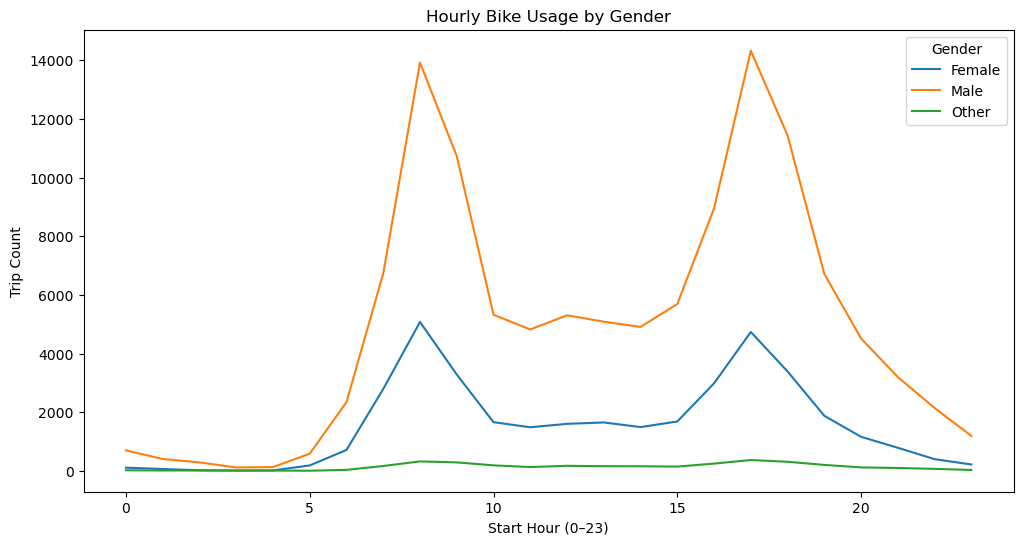

In [23]:
gender_hour = df.groupby(['start_hour','member_gender']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sb.lineplot(data=gender_hour, x='start_hour', y='count', hue='member_gender')
plt.title('Hourly Bike Usage by Gender')
plt.xlabel('Start Hour (0–23)')
plt.ylabel('Trip Count')
plt.legend(title='Gender')
plt.show()

# (Conclusion)

### **Key Findings**
- Riders behave differently across gender, user type, and time of day.
- **Subscribers** use the bike system for regular commuting.
- **Customers** take longer, leisure-oriented trips—especially on weekends.
- Gender patterns in usage are similar, though males represent the largest share.
- Trip durations show little correlation with location features.

### **What This Means**
These insights can support:
- Operational planning
- Station balancing
- Marketing campaigns
- Service optimization

Thank you!

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt